In [70]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

# import sys
# print(sys.executable)
# print(sys.version)
# print(sys.version_info)

a4_dims = (11.7, 8.27)

import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

no display found. Using non-interactive Agg backend


In [88]:
def vis_cascade(G, seed, threshold, nosteps):
    no_nodes = len(G.nodes())
    model = ep.ThresholdModel(G)
    config = mc.Configuration()
    
    infected_initial = seed
    for i in G.nodes():
        config.add_node_configuration("threshold", i, threshold)
        
    config.add_model_initial_configuration("Infected", infected_initial)
    model.set_initial_status(config)
    
    infected = defaultdict(lambda: False)

    iterations = model.iteration_bunch(nosteps)
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)

    for j in range(nosteps):
        for node in iterations[j]['status'].keys():
            if iterations[j]['status'][node]==1:
                infected[node]=True
                
    times = np.array(range(nosteps))
    no_infected = np.array([iterations[i]['node_count'][1] for i in range(nosteps)])/no_nodes

    fig, ax = plt.subplots(nrows=1,ncols=2,figsize = a4_dims)
    
    ax[1].plot(times,no_infected, linewidth=3)
    ax[1].set_xlabel("Time (iteration number)", fontsize=20)
    ax[1].set_ylabel("Proportion of adopters", fontsize=20)
    ax[1].set_ylim(0,1)

    pos = nx.spring_layout(G)
    pos = nx.kamada_kawai_layout(G,pos=pos)

    nx.draw_networkx_nodes(G, ax=ax[0], nodelist = [nd for nd in G.nodes() if infected[nd]], 
                           pos=pos, node_color='red')
    nx.draw_networkx_nodes(G, ax=ax[0], nodelist = [nd for nd in G.nodes() if not infected[nd]], 
                           pos=pos, node_color='black')
    nx.draw_networkx_edges(G, ax=ax[0], pos=pos, alpha = 0.3)


100%|██████████| 10/10 [00:00<00:00, 2020.67it/s]

300
[(23, 9)]


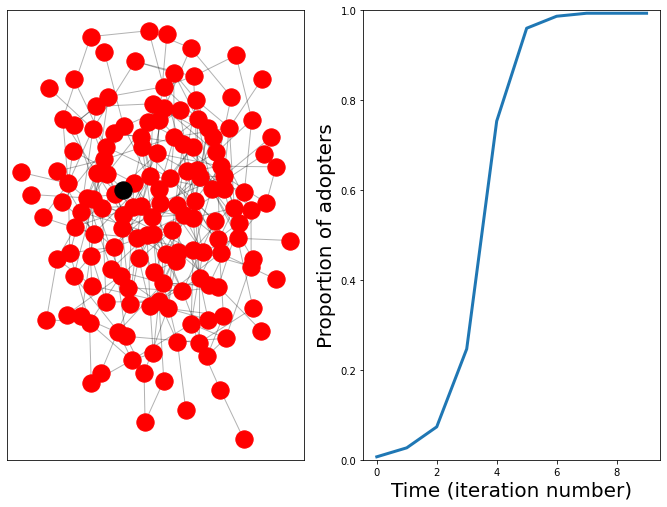

In [96]:
G = nx.gnm_random_graph(150,300)
print(len(G.edges()))

# Set cascade threshold

# Select highest degree node as seed
seed = [sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]]
print(G.degree(seed))

vis_cascade(G,[0],0.1,10)

100%|██████████| 10/10 [00:00<00:00, 1903.65it/s]

296


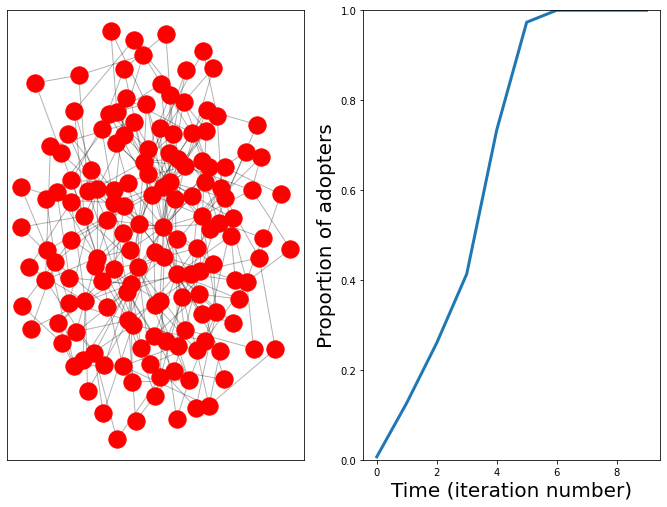

In [95]:
G = nx.barabasi_albert_graph(150, 2)
print(len(G.edges()))

# select highest degree node as seed
seed = [sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]]
seed = [0]
vis_cascade(G,seed,0.2,10)

100%|██████████| 10/10 [00:00<00:00, 1134.79it/s]


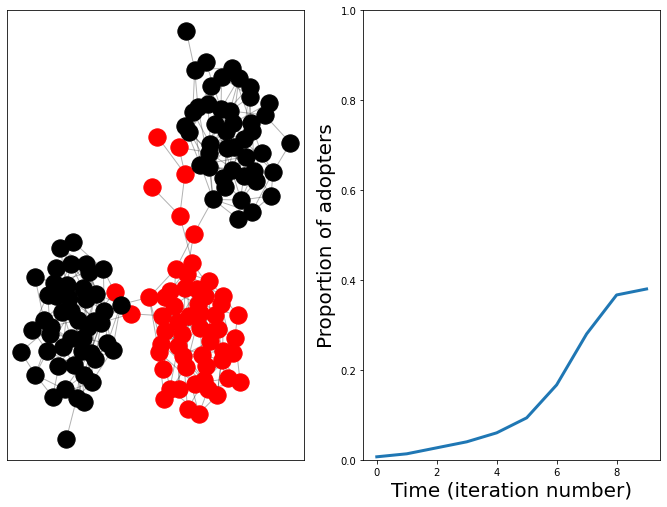

In [99]:
G = nx.planted_partition_graph(3, 50, 0.1, 0.0005)

vis_cascade(G,seed,0.2,10)

100%|██████████| 50/50 [00:00<00:00, 1474.83it/s]


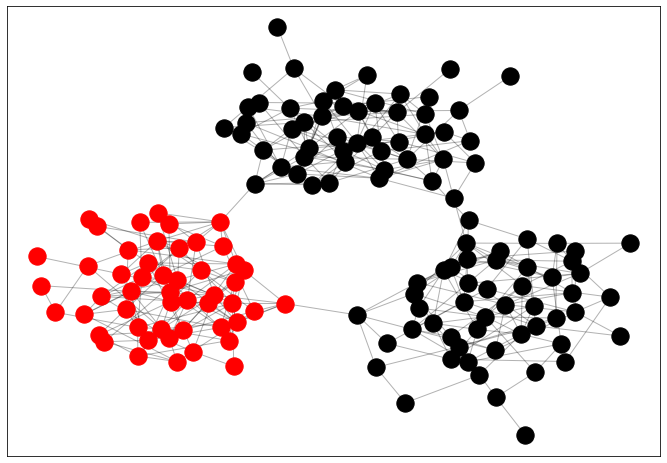

In [18]:
G = nx.planted_partition_graph(3, 50, 0.1, 0.0005)

model = ep.ThresholdModel(G)
config = mc.Configuration()

threshold = 0.2
infected_initial = [0]
for i in G.nodes():
    config.add_node_configuration("threshold", i, threshold)

config.add_model_initial_configuration("Infected", infected_initial)
model.set_initial_status(config)

infected = defaultdict(lambda: False)

iterations = model.iteration_bunch(50)

for j in range(50):
    for node in iterations[j]['status'].keys():
        if iterations[j]['status'][node]==1:
            infected[node]=True
        
fig, ax = plt.subplots(figsize = a4_dims)

pos = nx.kamada_kawai_layout(G,pos=pos)

nx.draw_networkx_nodes(G, ax=ax, nodelist = [nd for nd in G.nodes() if infected[nd]], 
                       pos=pos, node_color='red')
nx.draw_networkx_nodes(G, ax=ax, nodelist = [nd for nd in G.nodes() if not infected[nd]], 
                       pos=pos, node_color='black')
nx.draw_networkx_edges(G, ax=ax, pos=pos, alpha = 0.3)